# Explore here

Import libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

Dog train data ingestion

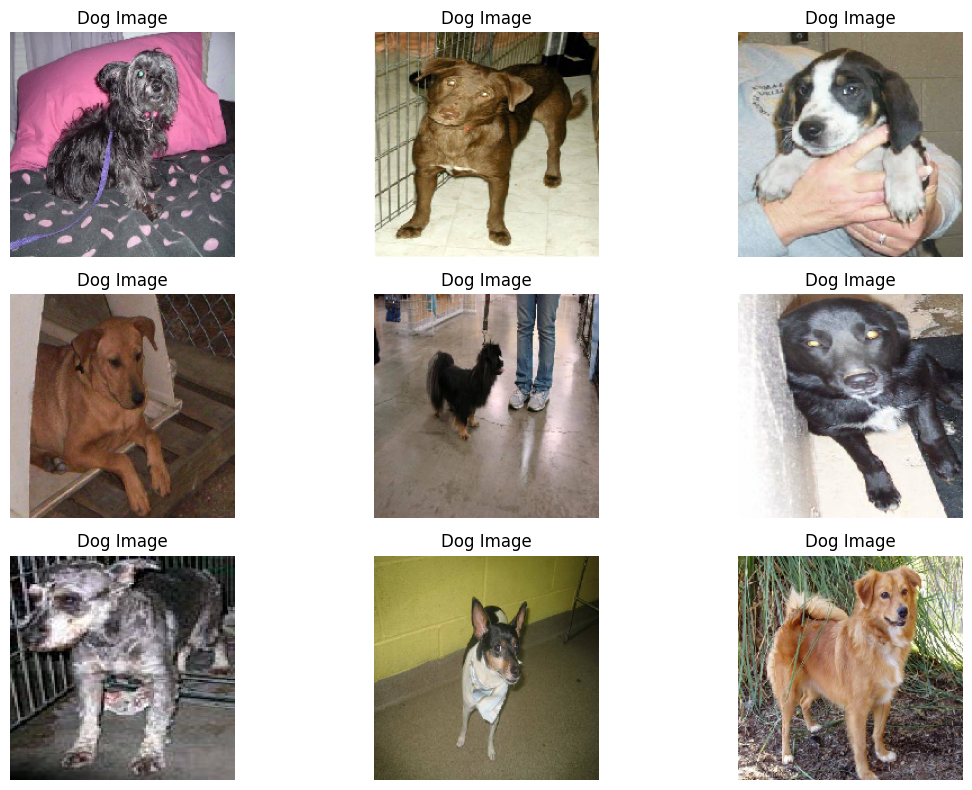

In [3]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to the directory containing your image data
data_dir = "../data/raw/train"  # Cambia la ruta a la carpeta de entrenamiento

# Get a list of all dog image file names
dog_subfolder = os.path.join(data_dir, "dog")

# Get a list of all dog image file names
dog_image_files = os.listdir(dog_subfolder)

# Load the first nine dog images
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path, target_size=(200, 200))  # Ajusta target_size según sea necesario
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)

# Create a single figure to display all nine images
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()


Cat train data ingestion

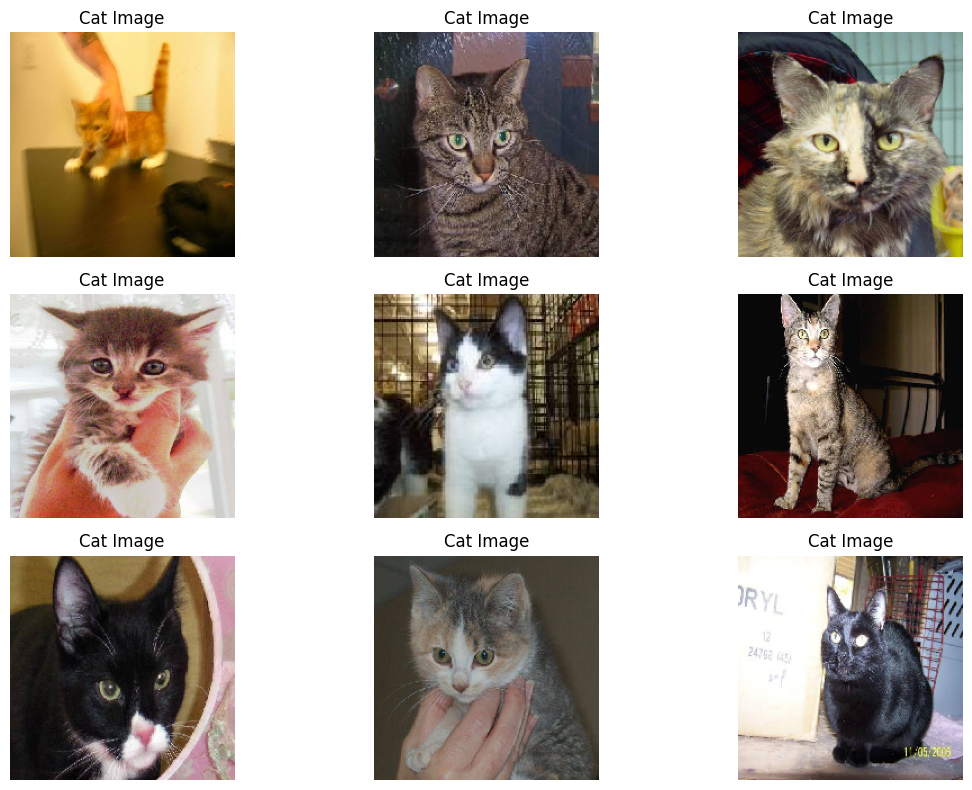

In [6]:

# Path to the directory containing your image data
data_dir = "../data/raw/train"  # Cambia la ruta a la carpeta de entrenamiento

# Get a list of all dog image file names
cat_subfolder = os.path.join(data_dir, "cat")

# Get a list of all dog image file names
cat_image_files = os.listdir(cat_subfolder)

# Load the first nine dog images
dog_images = []
for i in range(9):
    img_path = os.path.join(cat_subfolder, cat_image_files[i])
    img = image.load_img(img_path, target_size=(200, 200))  # Ajusta target_size según sea necesario
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)

# Create a single figure to display all nine images
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()
# Show the pictures
plt.show()

Create image dataset

In [8]:
from keras.preprocessing.image import ImageDataGenerator

# Define las rutas de los directorios
train_dir = "../data/raw/train"
test_dir = "../data/raw/test"
image_size = (200, 200)

# Define generadores de datos para entrenamiento y prueba
datagen_train = ImageDataGenerator(rescale=1./255)  # Normaliza los valores de píxeles

datagen_test = ImageDataGenerator(rescale=1./255)   # Normaliza los valores de píxeles

# Genera conjuntos de datos de entrenamiento y prueba
train_data = datagen_train.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["dog", "cat"],
    batch_size=32,  # Tamaño del lote
    class_mode='categorical'  # Modo categórico para clasificación de clases
)

test_data = datagen_test.flow_from_directory(
    test_dir,
    target_size=image_size,
    classes=["dog", "cat"],  # Incluye las clases de perros y gatos en el conjunto de prueba
    batch_size=32,  # Tamaño del lote
    class_mode='categorical'  # Modo categórico para clasificación de clases
)


Found 25000 images belonging to 2 classes.
Found 25000 images belonging to 2 classes.


Train the model

In [12]:
# Move the Data Through the Neural Network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [13]:
# Compile the Model using Adam 
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [14]:
# Train the Model
model.fit(train_data, epochs = 1)

782/782 [==============================] - 6012s 8s/step - loss: 0.7110 - accuracy: 0.5010


Save model

In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

Epoch 1/3
100/100 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5050
Epoch 1: val_accuracy improved from -inf to 0.53125, saving model to ../models\vgg16_1.h5


c:\Users\Rubén\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 795s 8s/step - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6923 - val_accuracy: 0.5312
Epoch 2/3
100/100 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.4931
Epoch 2: val_accuracy did not improve from 0.53125
100/100 [==============================] - 779s 8s/step - loss: 0.6935 - accuracy: 0.4931 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 3/3
100/100 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4981
Epoch 3: val_accuracy did not improve from 0.53125
100/100 [==============================] - 790s 8s/step - loss: 0.6932 - accuracy: 0.4981 - val_loss: 0.6932 - val_accuracy: 0.4875


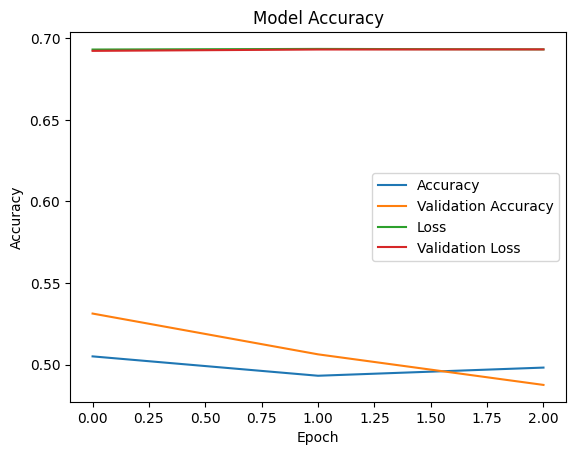

In [17]:
# Check the Accuracy of the Data

#Plot the Results
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()

1/1 [==============================] - 0s 398ms/step
Gato


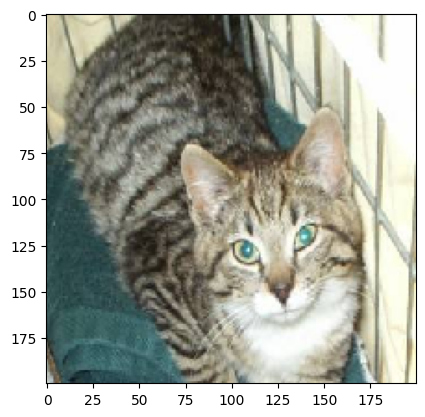

In [24]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Carga una imagen de prueba desde la carpeta de prueba
img = image.load_img("../data/raw/test/dog/19.jpg", target_size=(200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

# Carga el modelo previamente entrenado
saved_model = load_model("../models/vgg16_1.h5")

# Realiza la predicción en la imagen de prueba
output = saved_model.predict(img)

# Determina la clase predicha
if output[0][0] > output[0][1]:
    print("Perro")
else:
    print("Gato")


1/1 [==============================] - 0s 460ms/step
Gato


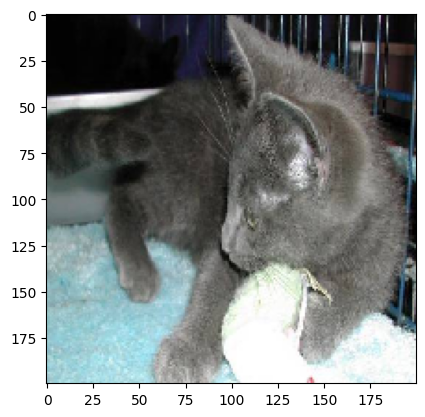

In [28]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Carga una imagen de prueba desde la carpeta de prueba de perros
img = image.load_img("../data/raw/test/cat/100.jpg", target_size=(200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

# Carga el modelo previamente entrenado
saved_model = load_model("../models/vgg16_1.h5")

# Realiza la predicción en la imagen de prueba
output = saved_model.predict(img)

# Determina la clase predicha
if output[0][0] > output[0][1]:
    print("Perro")
else:
    print("Gato")


Iterator prediction test

In [ ]:
import os
from keras.preprocessing import image
from keras.models import load_model
import numpy as np

# Paths to the test folders for dogs and cats
test_dog_dir = "../data/raw/test/dog"
test_cat_dir = "../data/raw/test/cat"

# Load the pre-trained model
saved_model = load_model("../models/vgg16_1.h5")

# Function to make predictions on an image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(200, 200))
    img = np.asarray(img)
    img = np.expand_dims(img, axis=0)
    output = saved_model.predict(img)
    return output

# Iterate through all the test images for dogs
for filename in os.listdir(test_dog_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(test_dog_dir, filename)
        output = predict_image(img_path)
        if output[0][0] > output[0][1]:
            print(f"Image: {filename} - Class: Dog")
        else:
            print(f"Image: {filename} - Class: Cat")

# Iterate through all the test images for cats
for filename in os.listdir(test_cat_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(test_cat_dir, filename)
        output = predict_image(img_path)
        if output[0][0] > output[0][1]:
            print(f"Image: {filename} - Class: Dog")
        else:
            print(f"Image: {filename} - Class: Cat")
